In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

In [ ]:
# Let's concatenate X and y along columns
df = pd.concat([X, y], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital-gain    45222 non-null  int64 
 11  capital-loss    45222 non-null  int64 
 12  hours-per-week  45222 non-null  int64 
 13  native-country  45222 non-null  object
 14  income          45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Replace "?" with NaNs
df.replace("?", np.nan, inplace=True)

# Treat empty data as NaNs
df.replace("", np.nan, inplace=True)

# Remove rows with NaN values
df.dropna(axis=0, inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

In [ ]:
# Iterate over each column in the DataFrame
for column in df.columns:
    # Print the column name
    print(column + ":", df[column].unique())

age: [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
fnlwgt: [ 77516  83311 215646 ... 173449  89686 350977]
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
education-num: [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-

In [ ]:
# Remove the period from income categories
df['income'] = df['income'].str.strip('.')

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# 1. Histograms
def plot_histograms(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# 2. Bar Plots
def plot_barplots(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=col)
        plt.title(f'Bar Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# 3. Box Plots
def plot_boxplots(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, y=col)
        plt.title(f'Box Plot of {col}')
        plt.ylabel(col)
        plt.show()

In [ ]:
plot_histograms(df)

In [ ]:
plot_barplots(df)

In [ ]:
plot_boxplots(df)

In [ ]:
df.to_csv("cleaned_adult_data.csv", index=False)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Load the cleaned dataset
df = pd.read_csv("cleaned_adult_data.csv")

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['income'])  # Features
y = df['income']  # Target variable

X_encoded = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=1)

In [5]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the classifier on the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = naive_bayes.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7915530330950099


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=1)

# Train the classifier on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8495614358369573


In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions for Naive Bayes
nb_predictions = naive_bayes.predict(X_test)

# Predictions for Random Forest
rf_predictions = random_forest.predict(X_test)

# Naive Bayes model evaluation
print("Evaluation Metrics for Naive Bayes:")
nb_report = classification_report(y_test, nb_predictions)
print(nb_report)

nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
print("Confusion Matrix for Naive Bayes:")
print(nb_conf_matrix)

# Random Forest model evaluation
print("\nEvaluation Metrics for Random Forest:")
rf_report = classification_report(y_test, rf_predictions)
print(rf_report)

rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix for Random Forest:")
print(rf_conf_matrix)

Evaluation Metrics for Naive Bayes:
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     10230
        >50K       0.66      0.31      0.42      3337

    accuracy                           0.79     13567
   macro avg       0.73      0.63      0.65     13567
weighted avg       0.77      0.79      0.76     13567

Confusion Matrix for Naive Bayes:
[[9695  535]
 [2293 1044]]

Evaluation Metrics for Random Forest:
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     10230
        >50K       0.73      0.62      0.67      3337

    accuracy                           0.85     13567
   macro avg       0.80      0.77      0.79     13567
weighted avg       0.84      0.85      0.85     13567

Confusion Matrix for Random Forest:
[[9452  778]
 [1263 2074]]


In [8]:
class_counts = df['income'].value_counts()
class_proportions = class_counts / class_counts.sum()
print(class_proportions)

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64


In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=1)
X_oversampled, y_oversampled = smote.fit_resample(X_encoded, y)

# Split the resampled dataset into training and testing sets
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=1)

# Convert the oversampled features and target arrays into DataFrame
df = pd.DataFrame(X_oversampled, columns=X_encoded.columns)
df['income'] = y_oversampled

In [10]:
class_counts = df['income'].value_counts()
class_proportions = class_counts / class_counts.sum()
print(class_proportions)

<=50K    0.5
>50K     0.5
Name: income, dtype: float64


In [11]:
# Initialize the Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the classifier on the resampled training data
naive_bayes.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the testing data
y_pred_oversampled = naive_bayes.predict(X_test_oversampled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test_oversampled, y_pred_oversampled)
print("Accuracy:", accuracy)

Accuracy: 0.6225194767014552


In [12]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=1)

# Train the classifier on the resampled training data
random_forest.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the testing data
y_pred_oversampled = random_forest.predict(X_test_oversampled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test_oversampled, y_pred_oversampled)
print("Accuracy:", accuracy)

Accuracy: 0.896271252878632


In [13]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions for Naive Bayes
nb_predictions = naive_bayes.predict(X_test_oversampled)

# Predictions for Random Forest
rf_predictions = random_forest.predict(X_test_oversampled)

# Naive Bayes model evaluation
print("Evaluation Metrics for Naive Bayes:")
nb_report = classification_report(y_test_oversampled, nb_predictions)
print(nb_report)

nb_conf_matrix = confusion_matrix(y_test_oversampled, nb_predictions)
print("Confusion Matrix for Naive Bayes:")
print(nb_conf_matrix)

# Random Forest model evaluation
print("\nEvaluation Metrics for Random Forest:")
rf_report = classification_report(y_test_oversampled, rf_predictions)
print(rf_report)

rf_conf_matrix = confusion_matrix(y_test_oversampled, rf_predictions)
print("Confusion Matrix for Random Forest:")
print(rf_conf_matrix)

Evaluation Metrics for Naive Bayes:
              precision    recall  f1-score   support

       <=50K       0.58      0.94      0.72     10256
        >50K       0.84      0.30      0.44     10153

    accuracy                           0.62     20409
   macro avg       0.71      0.62      0.58     20409
weighted avg       0.71      0.62      0.58     20409

Confusion Matrix for Naive Bayes:
[[9685  571]
 [7133 3020]]

Evaluation Metrics for Random Forest:
              precision    recall  f1-score   support

       <=50K       0.89      0.91      0.90     10256
        >50K       0.91      0.88      0.89     10153

    accuracy                           0.90     20409
   macro avg       0.90      0.90      0.90     20409
weighted avg       0.90      0.90      0.90     20409

Confusion Matrix for Random Forest:
[[9343  913]
 [1204 8949]]


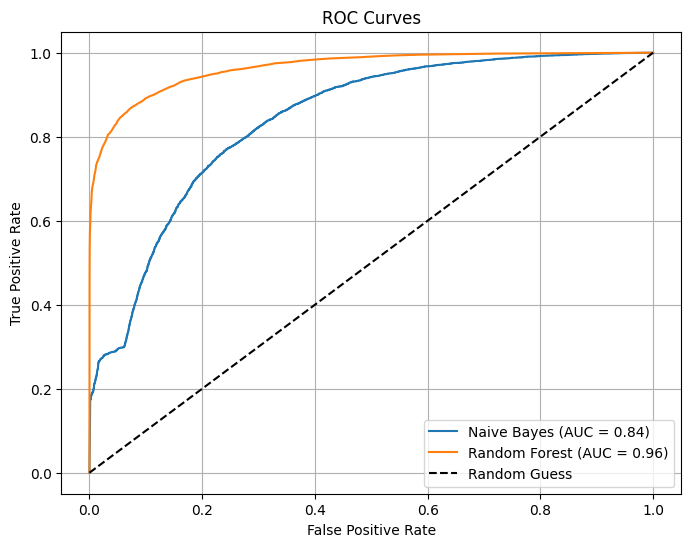

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Convert categorical labels to binary labels
y_test_binary = y_test_oversampled.replace({'<=50K': 0, '>50K': 1})

# Compute probabilities for Naive Bayes and Random Forest
nb_probs = naive_bayes.predict_proba(X_test_oversampled)[:, 1]
rf_probs = random_forest.predict_proba(X_test_oversampled)[:, 1]

# Compute ROC curve and ROC area for Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_test_binary, nb_probs)
nb_auc = roc_auc_score(y_test_binary, nb_probs)

# Compute ROC curve and ROC area for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test_binary, rf_probs)
rf_auc = roc_auc_score(y_test_binary, rf_probs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()